In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


StatementMeta(, 6ee4cf23-cc9f-4dd5-8e6b-653d38b7c2e8, 20, Finished, Available)

In [20]:
# Llamamos al dataframe que vamos a utilizar
df = pd.read_csv('abfss://558991ad-6fdf-463a-b58a-238ddabaa398@onelake.dfs.fabric.microsoft.com/37a0382d-f783-4728-a697-48b1dc002937/Files/DATA MODELO/data_final_Modelo.csv')

StatementMeta(, 6ee4cf23-cc9f-4dd5-8e6b-653d38b7c2e8, 22, Finished, Available)

ClientAuthenticationError: Operation returned an invalid status 'Unauthorized'
ErrorCode:Unauthorized

In [28]:
# Seleccionar solo las columnas numéricas
numericas = df.select_dtypes(include=['float64', 'int64'])

StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 30, Finished, Available)

In [29]:
numericas.corr()

StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 31, Finished, Available)

,RATING,REVIEW_COUNT,RATING_HOTEL
RATING,1.000000,0.022778,-0.023537
REVIEW_COUNT,0.022778,1.000000,0.188354
RATING_HOTEL,-0.023537,0.188354,1.000000


StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 33, Finished, Available)

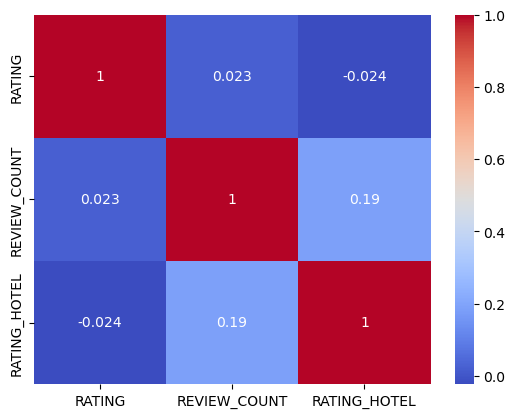

In [31]:
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')
plt.show()

# evaluacion


In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Dividir los datos en características (X) y variable objetivo (y)
X = df[['RATING', 'REVIEW_COUNT']]
y = df['RATING_HOTEL']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting Machines': GradientBoostingRegressor()
}

# Definir la cuadrícula de hiperparámetros para cada modelo
param_grid = {
    'Linear Regression': {},
    'Polynomial Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Support Vector Regression': {'C': [0.1, 1.0, 10.0], 'epsilon': [0.1, 0.01, 0.001]},
    'Gradient Boosting Machines': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}
}

# Realizar búsqueda de hiperparámetros y ajustar los modelos
results = {}
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='neg_mean_squared_error')
    if name == 'Polynomial Regression':
        X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
        grid_search.fit(X_train_poly, y_train)
    else:
        grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    if name == 'Polynomial Regression':
        X_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)
        y_pred = best_model.predict(X_test_poly)
    else:
        y_pred = best_model.predict(X_test)
    
    # Evaluar el rendimiento del modelo
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'Best Model': best_model, 'MSE': mse, 'MAE': mae, 'R^2': r2}

# Seleccionar el mejor modelo basado en el MSE
best_model_name = min(results, key=lambda x: results[x]['MSE'])
best_model = results[best_model_name]['Best Model']
best_mse = results[best_model_name]['MSE']
best_mae = results[best_model_name]['MAE']
best_r2 = results[best_model_name]['R^2']

# Mostrar el informe de rendimiento
print("Informe de rendimiento:")
print("-----------------------")
for name, result in results.items():
    print(f"Modelo: {name}")
    print(f"  MSE: {result['MSE']}")
    print(f"  MAE: {result['MAE']}")
    print(f"  R^2: {result['R^2']}")
    print()

print(f"Mejor modelo: {best_model_name}")
print(f"  MSE: {best_mse}")
print(f"  MAE: {best_mae}")
print(f"  R^2: {best_r2}")


StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 38, Finished, Available)

2024-04-25:11:41:57,409 WARNING  [tracking_store.py:153] log_inputs not supported


2024-04-25:11:42:33,466 WARNING  [tracking_store.py:153] log_inputs not supported


2024-04-25:11:42:42,640 WARNING  [tracking_store.py:153] log_inputs not supported


2024-04-25:11:42:51,57 WARNING  [tracking_store.py:153] log_inputs not supported


2024-04-25:11:43:36,978 WARNING  [tracking_store.py:153] log_inputs not supported


2024-04-25:11:45:50,311 WARNING  [tracking_store.py:153] log_inputs not supported


Informe de rendimiento:
-----------------------
Modelo: Linear Regression
  MSE: 2.512608449697162
  MAE: 1.09630709503137
  R^2: 0.0360055876587676

Modelo: Polynomial Regression
  MSE: 2.538468156462322
  MAE: 1.101427772385108
  R^2: 0.026084179956185838

Modelo: Ridge Regression
  MSE: 2.5126479659068557
  MAE: 1.0963533895903639
  R^2: 0.0359904267588087

Modelo: Lasso Regression
  MSE: 2.515425520750444
  MAE: 1.0976439421205488
  R^2: 0.03492478226910978

Modelo: Random Forest
  MSE: 2.7921331632251514
  MAE: 1.0542326737269072
  R^2: -0.07123764874153315

Modelo: Support Vector Regression
  MSE: 2.762845098231723
  MAE: 0.7089991556960574
  R^2: -0.060000907495456834

Modelo: Gradient Boosting Machines
  MSE: 2.4100820951359156
  MAE: 1.0432287118522552
  R^2: 0.0753411367080713

Mejor modelo: Gradient Boosting Machines
  MSE: 2.4100820951359156
  MAE: 1.0432287118522552
  R^2: 0.0753411367080713


# a

In [ ]:
# df.head(40)

vamos a preparar los datos para el modelado. Primero, dividiremos los datos en características (X) y la variable objetivo (y), que en este caso será la columna 'RATING_HOTEL'. Luego, dividiremos los datos en conjuntos de entrenamiento y prueba.

In [9]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df[['RATING', 'REVIEW_COUNT']]
y = df['RATING_HOTEL']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 11, Finished, Available)

Utilizaremos un modelo de regresión lineal para predecir el valor de la variable objetivo 'RATING_HOTEL'.

In [12]:
# Crear y entrenar el modelo de regresión lineal
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 14, Finished, Available)

2024-04-25:10:59:18,130 WARNING  [tracking_store.py:153] log_inputs not supported


LinearRegression()

In [35]:
# Realizar predicciones en el conjunto de prueba
y_pred = linear_regression.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir el informe de rendimiento
print("Informe de rendimiento del modelo de regresión lineal:")
print("----------------------------------------------------")
print("Error cuadrático medio (MSE): {:.4f}".format(mse))
print("Error absoluto medio (MAE): {:.4f}".format(mae))
print("Coeficiente de determinación (R^2): {:.4f}".format(r2))

# Calcular el RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE en el conjunto de prueba:", rmse)


StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 37, Finished, Available)

2024-04-25:11:30:41,318 WARNING  [tracking_store.py:153] log_inputs not supported


Informe de rendimiento del modelo de regresión lineal:
----------------------------------------------------
Error cuadrático medio (MSE): 2.5126
Error absoluto medio (MAE): 1.0963
Coeficiente de determinación (R^2): 0.0360
RMSE en el conjunto de prueba: 1.5851209574342149


predecir el valor de la variable objetivo 'RATING_HOTEL' para cada ciudad en nuestro conjunto de datos. Luego, ordenaremos las ciudades según la predicción de 'RATING_HOTEL' de mayor a menor, ya que queremos encontrar la mejor ciudad para abrir un nuevo hotel.

In [14]:
# Realizar predicciones para todas las ciudades
predictions = linear_regression.predict(X)

# Agregar las predicciones al dataframe original
df['PREDICTED_RATING_HOTEL'] = predictions

# Ordenar el dataframe según las predicciones de 'RATING_HOTEL'
df_sorted = df.sort_values(by='PREDICTED_RATING_HOTEL', ascending=False)

# Mostrar el dataframe ordenado
df_sorted.head(30)


StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 16, Finished, Available)

2024-04-25:11:00:02,775 WARNING  [tracking_store.py:153] log_inputs not supported


,STATE,CITY,RATING,REVIEW_COUNT,RATING_HOTEL,PREDICTED_RATING_HOTEL
3359,Florida,New Orleans,4.608423,98535334,4.724675,10.846494
10241,Pennsylvania,Philadelphia,4.594677,90451346,4.474359,10.013652
10190,Pennsylvania,New Orleans,4.599039,87491533,4.647614,9.706218
3420,Florida,Orlando,4.833766,73023690,4.766667,8.146610
7836,Nevada,Pahrump,4.824571,70423515,4.721092,7.880002
1623,California,Los Angeles,4.811171,62639783,4.817857,7.078136
753,Arizona,New Orleans,4.686483,60365459,4.867600,6.876010
1521,California,Knights Landing,4.781717,58235689,4.333333,6.630261
7331,Missouri,New Orleans,4.610553,55235800,4.566860,6.365435
3797,Florida,Windermere,4.787223,50291993,4.547297,5.806807


StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 34, Finished, Available)

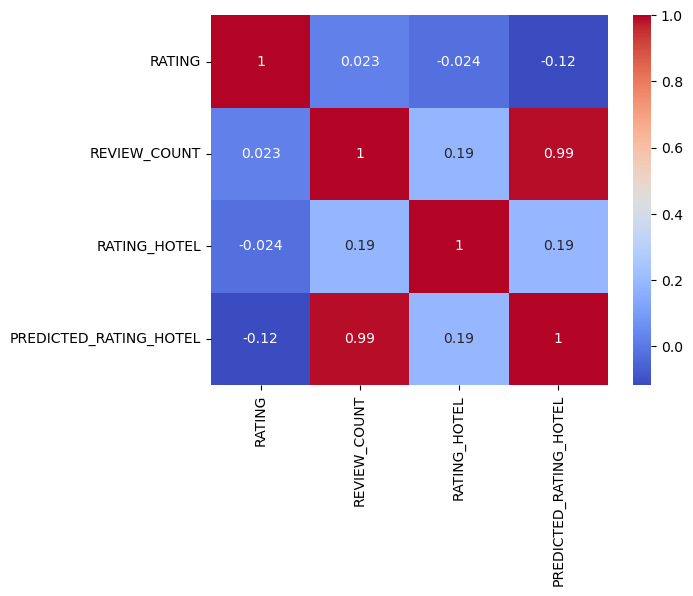

In [32]:
sns.heatmap(df_sorted.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.show()

Esto nos dará el dataframe ordenado según las predicciones de 'RATING_HOTEL' para nuestros potenciales hoteles, donde las primeras ciudades serán las mejores opciones para abrir un nuevo hotel

In [15]:
# Mostrar las 10 mejores ciudades para abrir un nuevo hotel
# top_cities = df_sorted.head(10)
# print("Las 10 mejores ciudades para abrir un nuevo hotel son:")
# print(top_cities[['STATE', 'CITY', 'PREDICTED_RATING_HOTEL']])


StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 17, Finished, Available)

Las 10 mejores ciudades para abrir un nuevo hotel son:
              STATE             CITY  PREDICTED_RATING_HOTEL
3359        Florida      New Orleans               10.846494
10241  Pennsylvania     Philadelphia               10.013652
10190  Pennsylvania      New Orleans                9.706218
3420        Florida          Orlando                8.146610
7836         Nevada          Pahrump                7.880002
1623     California      Los Angeles                7.078136
753         Arizona      New Orleans                6.876010
1521     California  Knights Landing                6.630261
7331       Missouri      New Orleans                6.365435
3797        Florida       Windermere                5.806807


In [16]:
df_sorted.head(20)

StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 18, Finished, Available)

,STATE,CITY,RATING,REVIEW_COUNT,RATING_HOTEL,PREDICTED_RATING_HOTEL
3359,Florida,New Orleans,4.608423,98535334,4.724675,10.846494
10241,Pennsylvania,Philadelphia,4.594677,90451346,4.474359,10.013652
10190,Pennsylvania,New Orleans,4.599039,87491533,4.647614,9.706218
3420,Florida,Orlando,4.833766,73023690,4.766667,8.146610
7836,Nevada,Pahrump,4.824571,70423515,4.721092,7.880002
1623,California,Los Angeles,4.811171,62639783,4.817857,7.078136
753,Arizona,New Orleans,4.686483,60365459,4.867600,6.876010
1521,California,Knights Landing,4.781717,58235689,4.333333,6.630261
7331,Missouri,New Orleans,4.610553,55235800,4.566860,6.365435
3797,Florida,Windermere,4.787223,50291993,4.547297,5.806807


ordenamiento tomando como criterio la columna la mayor interaccion comercial (zona potencialmente con mayor caudal de comercio y consumo)

In [17]:
df_sorted.sort_values(by= 'REVIEW_COUNT', ascending= False).head(20)

StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 19, Finished, Available)

,STATE,CITY,RATING,REVIEW_COUNT,RATING_HOTEL,PREDICTED_RATING_HOTEL
3359,Florida,New Orleans,4.608423,98535334,4.724675,10.846494
10241,Pennsylvania,Philadelphia,4.594677,90451346,4.474359,10.013652
10190,Pennsylvania,New Orleans,4.599039,87491533,4.647614,9.706218
3420,Florida,Orlando,4.833766,73023690,4.766667,8.146610
7836,Nevada,Pahrump,4.824571,70423515,4.721092,7.880002
1623,California,Los Angeles,4.811171,62639783,4.817857,7.078136
753,Arizona,New Orleans,4.686483,60365459,4.867600,6.876010
1521,California,Knights Landing,4.781717,58235689,4.333333,6.630261
7331,Missouri,New Orleans,4.610553,55235800,4.566860,6.365435
3797,Florida,Windermere,4.787223,50291993,4.547297,5.806807


In [19]:
df_sorted.sort_values(by= ['REVIEW_COUNT', 'RATING'], ascending= (False, False)).head(20)

StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 21, Finished, Available)

,STATE,CITY,RATING,REVIEW_COUNT,RATING_HOTEL,PREDICTED_RATING_HOTEL
3359,Florida,New Orleans,4.608423,98535334,4.724675,10.846494
10241,Pennsylvania,Philadelphia,4.594677,90451346,4.474359,10.013652
10190,Pennsylvania,New Orleans,4.599039,87491533,4.647614,9.706218
3420,Florida,Orlando,4.833766,73023690,4.766667,8.146610
7836,Nevada,Pahrump,4.824571,70423515,4.721092,7.880002
1623,California,Los Angeles,4.811171,62639783,4.817857,7.078136
753,Arizona,New Orleans,4.686483,60365459,4.867600,6.876010
1521,California,Knights Landing,4.781717,58235689,4.333333,6.630261
7331,Missouri,New Orleans,4.610553,55235800,4.566860,6.365435
3797,Florida,Windermere,4.787223,50291993,4.547297,5.806807


In [22]:
df_sorted.sort_values(by= ['RATING_HOTEL', 'RATING'], ascending= (False, False)).head(20)

StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 24, Finished, Available)

,STATE,CITY,RATING,REVIEW_COUNT,RATING_HOTEL,PREDICTED_RATING_HOTEL
12803,Virginia,Stuart,5.000000,2156,5.0,0.546305
4595,Illinois,St Pete beach,5.000000,1156,5.0,0.546201
7483,Missouri,Violet,5.000000,1056,5.0,0.546191
5159,Louisiana,Carencro,5.000000,468,5.0,0.546130
8368,New Jersey,Tierra Verde,5.000000,420,5.0,0.546125
3920,Georgia,Enigma,5.000000,390,5.0,0.546122
6805,Mississippi,D'Lo,5.000000,315,5.0,0.546114
9732,North Carolina,Sunshine,5.000000,270,5.0,0.546110
2727,Florida,Ave Maria,5.000000,260,5.0,0.546109
8142,New Jersey,HENDERSONVILLE,5.000000,169,5.0,0.546099


In [23]:
df_sorted.sort_values(by= ['RATING_HOTEL', 'RATING'], ascending= (True, False)).head(20)

StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 25, Finished, Available)

,STATE,CITY,RATING,REVIEW_COUNT,RATING_HOTEL,PREDICTED_RATING_HOTEL
6101,Maryland,Harpers Ferry,5.0,5232,0.0,0.546623
13388,Washington,Tanner,5.0,3888,0.0,0.546484
2077,California,Shelter Valley,5.0,3196,0.0,0.546412
4899,Indiana,New Washoe City,5.0,3135,0.0,0.546406
9377,North Carolina,Ellenboro,5.0,2926,0.0,0.546384
10542,South Carolina,Cashion Crossroads,5.0,2924,0.0,0.546384
2755,Florida,Belleair,5.0,2870,0.0,0.546379
101,Alabama,Church Hill,5.0,2804,0.0,0.546372
8379,New Jersey,Tucson,5.0,2703,0.0,0.546361
6946,Mississippi,Oldham,5.0,2496,0.0,0.546340


In [24]:
df_sorted.sort_values(by= ['RATING_HOTEL', 'REVIEW_COUNT'], ascending= (True, False)).head(20)

StatementMeta(, e025a014-a07f-4fb2-9506-0bb913663210, 26, Finished, Available)

,STATE,CITY,RATING,REVIEW_COUNT,RATING_HOTEL,PREDICTED_RATING_HOTEL
2935,Florida,Doral,4.779270,47361601,0.0,5.505698
2743,Florida,Bay Lake,4.747113,45441395,0.0,5.315567
9325,North Carolina,Colfax,4.765959,39937292,0.0,4.741001
6152,Maryland,Linthicum Heights,4.815089,28886963,0.0,3.584463
12623,Virginia,Motorun,4.662937,26657408,0.0,3.394284
11982,Texas,Quinlan,4.783136,24922770,0.0,3.182773
12216,Virginia,Ashburn,4.825340,22920694,0.0,2.964363
3658,Florida,Sunrise,4.806608,19379675,0.0,2.602939
11754,Texas,Katy,4.880958,19313280,0.0,2.576265
10785,South Carolina,Prosperity,4.803970,18252000,0.0,2.486954


# PRUEBAS PAULO

In [21]:
df

StatementMeta(, 6ee4cf23-cc9f-4dd5-8e6b-653d38b7c2e8, 23, Finished, Available)

,STATE,CITY,RATING,REVIEW_COUNT,RATING_HOTEL
0,Alabama,Abbeville,4.863354,1151,0.0
1,Alabama,Adamsville,4.729949,12439,0.0
2,Alabama,Addison,4.743869,92302,0.0
3,Alabama,Agricola,4.709686,7940,0.0
4,Alabama,Alabaster,4.707449,59544,0.0
...,...,...,...,...,...
13441,Washington,Yakima,4.735437,398694,0.0
13442,Washington,Yarrow Point,4.751852,5032,0.0
13443,Washington,Yelm,4.795434,577714,0.0
13444,Washington,Zillah,4.682499,79181,0.0


In [22]:
# Selecciona las características relevantes para el cálculo de similitud
caracteristicas_relevantes = df[['RATING', 'REVIEW_COUNT']]

# Calcula la similitud del coseno entre todas las filas de la matriz de características
similitud_coseno = cosine_similarity(caracteristicas_relevantes)

# Visualiza la matriz de similitud del coseno
print(similitud_coseno)

StatementMeta(, 6ee4cf23-cc9f-4dd5-8e6b-653d38b7c2e8, 24, Finished, Available)

[[1.         0.99999261 0.99999129 ... 0.99999111 0.99999132 0.99999228]
 [0.99999261 1.         0.99999995 ... 0.99999993 0.99999995 1.        ]
 [0.99999129 0.99999995 1.         ... 1.         1.         0.99999997]
 ...
 [0.99999111 0.99999993 1.         ... 1.         1.         0.99999996]
 [0.99999132 0.99999995 1.         ... 1.         1.         0.99999997]
 [0.99999228 1.         0.99999997 ... 0.99999996 0.99999997 1.        ]]


In [36]:
def ciudades_similares_por_estado(estado, similitud_coseno, df):
    # Filtrar el DataFrame para obtener solo las ciudades del estado dado
    ciudades_estado = df[df['STATE'] == estado]['CITY']
    
    # Obtener los índices de las ciudades del estado en la matriz de similitud del coseno
    indices_estado = df[df['STATE'] == estado].index[0]
    indices_estado_aux = df[df['STATE'] == estado].index

    
    # Crear una lista para almacenar los 5 índices más similares para cada ciudad del estado
    indices_similares = []

    similitud_coseno_estado = similitud_coseno[indices_estado]
    
    # Iterar sobre las ciudades del estado y calcular las similitudes con otras ciudades
    for i, ciudad in zip(indices_estado_aux, ciudades_estado):
        # Obtener las similitudes de la ciudad actual con otras ciudades
        similitudes_ciudad = similitud_coseno_estado[i]
        
        # Ordenar las similitudes y obtener los 5 índices más similares (excluyendo el índice actual)
        indices_similares_ciudad = sorted(range(len(similitudes_ciudad)), key=lambda x: similitudes_ciudad[x], reverse=True)[:5]
        
        # Almacenar los 5 índices más similares en la lista
        indices_similares.extend(indices_similares_ciudad)

    
    return indices_similares

# Ejemplo de uso:
estado = 'California'  # Reemplaza 'Alabama' con el estado que desees
resultado = ciudades_similares_por_estado(estado, similitud_coseno, df)
print(resultado)



StatementMeta(, 6ee4cf23-cc9f-4dd5-8e6b-653d38b7c2e8, 38, Finished, Available)

TypeError: object of type 'numpy.float64' has no len()

In [31]:
def ciudades_similares_por_estado(estado, similitud_coseno, df):
    # Filtrar el DataFrame para obtener solo las ciudades del estado dado
    ciudades_estado = df[df['STATE'] == estado]['CITY']
    
    # Obtener el índice de las ciudades del estado en la matriz de similitud del coseno
    indices_estado = df[df['STATE'] == estado].index
    
    # Crear una lista para almacenar los 5 índices más similares para cada ciudad del estado
    indices_similares = []
    
    # Iterar sobre las ciudades del estado y calcular las similitudes con otras ciudades
    for i, ciudad in zip(indices_estado, ciudades_estado):
        # Obtener las similitudes de la ciudad actual con otras ciudades
        similitudes_ciudad = similitud_coseno[i]
        
        # Ordenar las similitudes y obtener los 5 índices más similares (excluyendo el índice actual)
        indices_similares_ciudad = [idx for idx, _ in sorted(enumerate(similitudes_ciudad), key=lambda x: x[1], reverse=True) if idx != i][:5]
        
        # Almacenar los 5 índices más similares en la lista
        indices_similares.extend(indices_similares_ciudad)

    ciudades_similares = df[['STATE', 'CITY', 'RATING','REVIEW_COUNT','RATING_HOTEL']].iloc[indices_similares[:5]]
    return ciudades_similares
# Ejemplo de uso:
estado = 'Alabama'  # Reemplaza 'Alabama' con el estado que desees
resultado = ciudades_similares_por_estado(estado, similitud_coseno, df)
print(resultado)


StatementMeta(, 6ee4cf23-cc9f-4dd5-8e6b-653d38b7c2e8, 33, Finished, Available)

                STATE           CITY    RATING  REVIEW_COUNT  RATING_HOTEL
9303   North Carolina    Cerro Gordo  4.900000          1160      0.000000
10185    Pennsylvania  National Park  4.588710          1085      0.000000
5460        Louisiana       Valewood  4.875000          1152      0.000000
12104           Texas     The Colony  4.869565          1150      0.000000
9566   North Carolina     Mooresboro  4.776831          1128      4.565217


In [11]:
def evaluar_rendimiento_modelo(recomendaciones, ciudades_relevantes):
    # Calcular precisión
    precision = sum(ciudad in ciudades_relevantes for ciudad in recomendaciones) / len(recomendaciones)
    
    # Calcular cobertura
    cobertura = sum(ciudad in recomendaciones for ciudad in ciudades_relevantes) / len(ciudades_relevantes)
    
    # Calcular F1-score
    if precision + cobertura == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * cobertura) / (precision + cobertura)
    
    return precision, cobertura, f1_score

StatementMeta(, 6ee4cf23-cc9f-4dd5-8e6b-653d38b7c2e8, 13, Finished, Available)

In [ ]:
# Ejemplo de uso:
recomendaciones = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']  # Ejemplo de ciudades recomendadas
ciudades_relevantes = ['New York', 'Los Angeles', 'Chicago']  # Ejemplo de ciudades relevantes

precision, cobertura, f1_score = evaluar_rendimiento_modelo(recomendaciones, ciudades_relevantes)
print("Precisión:", precision)
print("Cobertura:", cobertura)
print("F1-score:", f1_score)